## Projet numérique : Équations Différentielles
Maxime Leroy & Paul Meddeb

### Question 1

Le système se réécrit :
$$
\begin{cases}
\frac{\mathrm d}{\mathrm dt} ln(x_1) = \alpha - \beta x_2 & \\ \\
\frac{\mathrm d}{\mathrm dt} ln(x_2) = - \gamma + \delta x_1 &
\end{cases}
$$

Ainsi $\alpha$ et $\beta$ sont liés respectivement à la croissance et à la décroissance de la population de proies ou de prédateurs quand l'autre espèce est absente. $\beta$ et $\delta$ traduisent l'influence qu'a la taille d'une population sur l'évolution de l'autre. Le nombre de prédateurs est lié à une diminution de l'accroissement de la population de proies via le terme en $- \beta x_2$ et le nombre de proies est lié à une augmentation de l'accroissement de la population de prédateurs via le terme en $+ \delta x_1$.

Le système s'écrit pour $x = (x_1, x_2) \in \mathbb R_+^2$ :
$$
\dot{x} = f(x) \quad \text{où} \quad f(x_1, x_2) = \big(x_1(\alpha - \beta x_2), -x_2(\gamma - \delta x_1)\big)
$$

Pour $x = (x_1, x_2) \in \mathbb R_+^2$ on a :
$$
\begin{array}{ccl}
f(x) = 0 & \iff & 
{\begin{cases}
x_1(\alpha - \beta x_2) = 0\\
x_2(\gamma - \delta x_1) = 0
\end{cases}}\\ \\ & \iff &
{\begin{cases}
x_1 = 0 \text{ ou } x_2 = \frac{\alpha}{\beta}\\
x_2 = 0 \text{ ou } x_1 = \frac{\gamma}{\delta}
\end{cases}} \\ \\ & \iff &
x = 0 \quad \text{ou} \quad x = \left(\frac{\gamma}{\delta}, \frac{\alpha}{\beta}\right)
\end{array}
$$

Il existe donc deux points d'équilibre $(0,0) \text{ et } \bar{x} = \left(\frac{\gamma}{\delta}, \frac{\alpha}{\beta}\right)$.

Etudions maintenant leur stabilité.
Pour $x = (x_1, x_2) \in \mathbb R_+^2$ on a :

$$
J_f(x) = \begin{pmatrix} \alpha - \beta x_2 & -\beta x_1 \\ \delta x_2 & \delta x_1 - \gamma \end{pmatrix}
$$

On a en particulier :
$$
\begin{array}{ccl}
J_f(0) = \begin{pmatrix} \alpha & 0 \\ 0 & -\gamma \end{pmatrix} & \quad \text{de valeurs propres } \alpha \text{ et } -\gamma \\ \\
J_f(\bar{x}) = \begin{pmatrix} 0 & -\frac{\beta \gamma}{\delta} \\ \frac{\delta \alpha}{\beta} & 0 \end{pmatrix} & \quad \text{de valeurs propres } \pm i \alpha \gamma
\end{array}
$$

On en déduit que $(0,0)$ est instable et on ne peut rien dire de la stabilité de $\bar{x}$ pour l'instant.

### Question 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
alpha = 250
beta = 1
gamma = 200
delta = 1

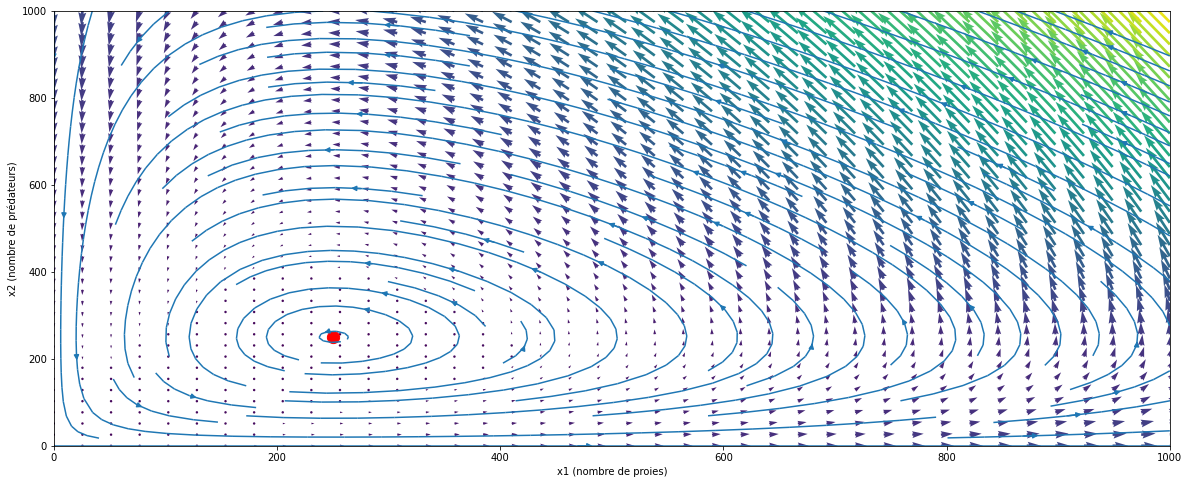

In [14]:
x1 = np.linspace(0, 1000, 40)
x2 = np.linspace(0, 1000, 40)
X1, X2 = np.meshgrid(x1, x2)
U = X1 * (alpha - beta * X2)
V = -X2 * (gamma - delta * X1)


color_array = np.sqrt(((V)/2)**2 + ((U)/2)**2)
fig, ax = plt.subplots(figsize = (20,8))
ax.quiver(X1, X2, U, V, color_array)
ax.streamplot(X1, X2, U, V)
ax.set(xlabel = "x1 (nombre de proies)", ylabel = "x2 (nombre de prédateurs)")
plt.scatter(gamma/delta, alpha/beta, s = 150, c = "red" )
plt.plot ;

On peut voir que les solutions "gravitent" autour du point d'équilibre $\bar{x}$ ici pointé en rouge sur le graphique.

### Question 3
$f$ est continûment différentiable (car $x  \mapsto J_f(x)$ est continue) et le théorème de Cauchy-Lipschitz peut donc s'appliquer.

Soit $(t_0, x_0) \in \mathbb R \times (\mathbb R_+^*)^2$. 

Soit $x : [t_0, t_{max}[ \longrightarrow \mathbb R _+ ^2$ l'unique solution maximale sur  $[t_0,+\infty[ \text{ dans } S_f(t_0, x_0). \quad \left(\text{où} \quad t_{max} \in \; ]t_0, +\infty]\right)$ 

On suppose par l'absurde qu'il existe $t_1 > t_0$ tel que $x_1(t_1) = 0$ ou $ x_2(t_1) = 0 $. Les deux cas étant symétriques on suppose par exemple que $x_1(t_1) = 0$.

D'après l'unicité de la solution maximale sur $[t_1, +\infty[, \quad \forall t \in [t_1, t_{max}[, \quad x_1(t) = 0 \quad \text{et} \quad x_2(t) = x_2(t_1) e^{-\gamma (t-t_1)}$.

On pose :

$$
\begin{array}{l|rcl}
y : & [t_0, t_{max}[ & \longrightarrow & \mathbb R_+^2 \\
    & t & \longmapsto & \left(0, \; x_2(t_1) e^{-\gamma (t-t_1)}\right) \end{array}
$$

Alors $x$ et $y$ sont deux solutions maximales sur $[t_0, t_{max}$ dans $S_f(t_1, x(t_1))$. Or $x$ et $y$ sont distinctes car $x_1(t_0)\neq y_1(t_0) = 0$ ce qui contredit l'unicité de la solution maximale.

Donc toute solution initialisée dans $\mathbb R_+^* \times \mathbb R_+^*$ reste dans $\mathbb R_+^* \times \mathbb R_+^*$.

### Question 4

Le long d'une solution $x = (x_1, x_2)$ initialisée dans $\mathbb R_+^* \times \mathbb R_+^*$ on a :

$$
H(x_1, x_2) = \delta x_1 - \gamma \ln(x_1) + \beta x_2 - \alpha \ln(x_2)
$$
D'où :
$$
\begin{align*}
        \frac{\mathrm d}{\mathrm dt}\big({H(x)}\big) & = \delta x_1(\alpha-\beta x_2) - \gamma(\alpha-\beta x_2) - \beta x_2(\gamma-\delta x_1) + \alpha(\gamma-\delta x_1) \\
        &= (\delta x_1-\gamma)(\alpha-\beta x_2) - (\delta x_1-\gamma)(\alpha-\beta x_2) \\
        &= 0
\end{align*}
$$

Donc $H$ est constante le long des solutions initialisées dans $\mathbb R_+^* \times \mathbb R_+^*$.


Soit $(t_0, x_0) \in \mathbb R \times (\mathbb R_+^*)^2 \text{ et } x : [t_0, t_{max}[ \longrightarrow \mathbb R _+ ^2$ l'unique solution maximale sur  $[t_0,+\infty[ \text{ dans } S_f(t_0, x_0). \quad \left(\text{où} \quad t_{max} \in \; ]t_0, +\infty]\right)$ . 
Si $t_{max}$ est fini alors d'après le théorème du domaine maximal et sachant que f est défini sur $\mathbb R_+^2$, $\lim\limits_{t \to +\infty} \|x(t)\| = +\infty$.

On suppose par l'absurde que $t_{max}$ est fini et on va montrer qu'alors $H(x) \xrightarrow [t \to t_{max}]{} +\infty $.

On sait que $\lim\limits_{t \to +\infty} \|x(t)\| = +\infty$, il suffit donc de montrer que $H(x) \xrightarrow [\|x\| \to +\infty]{} +\infty $.

Soit $M > 0$.

Remarquons d'abord que $\quad \delta x_1 - \gamma \ln(x_1) \xrightarrow [x_1 \to +\infty]{} +\infty \quad \text{et} \quad \beta x_2 - \alpha \ln(x_2) \xrightarrow [x_2 \to +\infty]{} +\infty $.

On dispose de $N_1 > 0$ tel que : 

$$
\forall x_1 \geq N_1, \quad \delta x_1 - \gamma \ln(x_1) \geq 0 \qquad \text{et} \qquad \forall x_1 \geq N_1, \quad \beta x_2 - \alpha \ln(x_2) \geq 0
$$

Soit :
$$
m_1 = \min_{x_1 \in [0, N_1]} (\delta x_1 - \gamma \ln(x_1)) \\
m_2 = \min_{x_2 \in [0, N_1]} (\beta x_2 - \alpha \ln(x_2))
$$

On dispose de $N_2 > N_1$ tel que :

$$
\forall x_1 \geq N_2, \quad \delta x_1 - \gamma \ln(x_1) \geq M - m_2 \qquad \text{et} \qquad \forall x_2 \geq N_2, \quad \beta x_2 - \alpha \ln(x_2) \geq M - m_1 
$$


Pour $\quad \|x\|^2 \geq 2 N_2^2 \quad i.e. \quad x_1^2 + x_2^2 \geq 2 N_2^2 \quad$ on a $\quad x_1 \geq N_2 \quad$ ou $\quad x_2 \geq N_2$.

Si $x_1 \geq N_2 \quad \text{alors} \quad H(x_1, x_2) \geq M - m_2 + m_2 = M$.

Et si $ x_2 \geq N_2 \quad \text{alors} \quad H(x_1, x_2) \geq m_1 + M - m_1 = M$.

Ainsi $H(x) \xrightarrow [\|x\| \to +\infty]{} +\infty $ et $t_{max} = +\infty$.

Donc toute solution maximale initialiseé dans $\mathbb R_+^* \times \mathbb R_+^*$ est définie sur $\mathbb R$.

### Question 5

<ipython-input-15-7b3cc90345e0>:4: RuntimeWarning: divide by zero encountered in log
  z = delta * X1 - gamma * np.log(X1) + beta * X2 - alpha * np.log(X2)


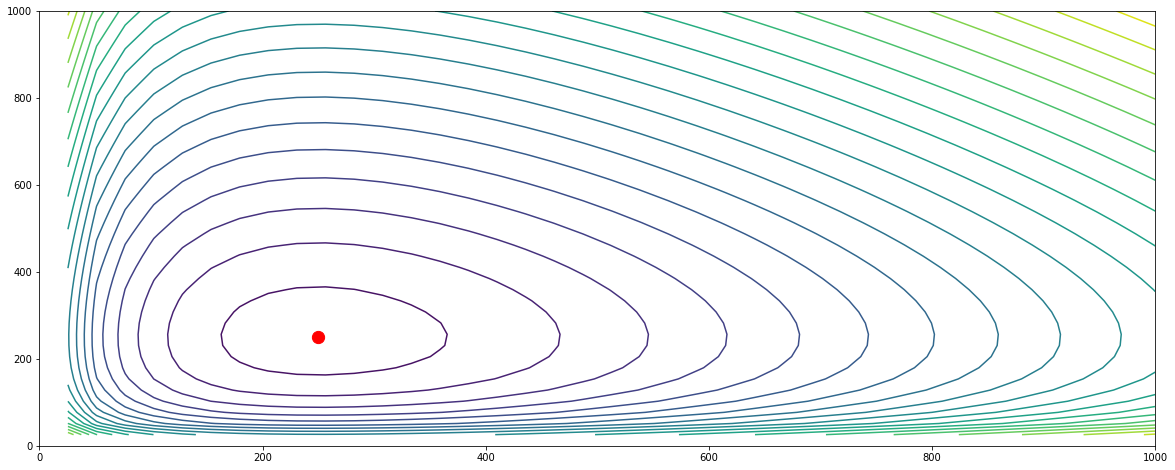

In [15]:
x1 = np.linspace(0, 1000, 40)
x2 = np.linspace(0, 1000, 40)
X1, X2 = np.meshgrid(x1, x2)
z = delta * X1 - gamma * np.log(X1) + beta * X2 - alpha * np.log(X2)

fig, ax = plt.subplots(figsize = (20,8))
ax.contour(x1, x2, z, 20)
ax.scatter(gamma/delta, alpha/beta, s = 150, c = "red" )
plt.plot;

Comme $H$ est constant le long des solutions et que celles-ci sont de classe $C^1$ et définies sur $\mathbb R$ le tracé des courbes de niveau de $H$ correspond au tracé du portrait de phase. On observe donc que les solutions "gravitent" effectivement autour de $\bar{x}$ qui est manifestement un point d'équilibre stable. En effet si l'on initialise une solution assez proche de $\bar{x}$ elle ne sortira pas de la courbe de niveau de $H$ correspondante et restera arbitrairement proche de $\bar{x}$.

### Question 6

In [131]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t_vector = np.arange(t0, tf, dt)
    x_vector = np.array([x0])
    x=x0
    for t in t_vector :
        x += f(t,x)*dt
        x_vector = np.append(x_vector, [x], axis = 0)
    t_vector = np.append(t_vector, [tf])
    return t_vector, x_vector

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.] [1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01
 6.4000e+01 1.2800e+02 2.5600e+02 5.1200e+02 1.0240e+03 2.0480e+03
 4.0960e+03 8.1920e+03 1.6384e+04 3.2768e+04]


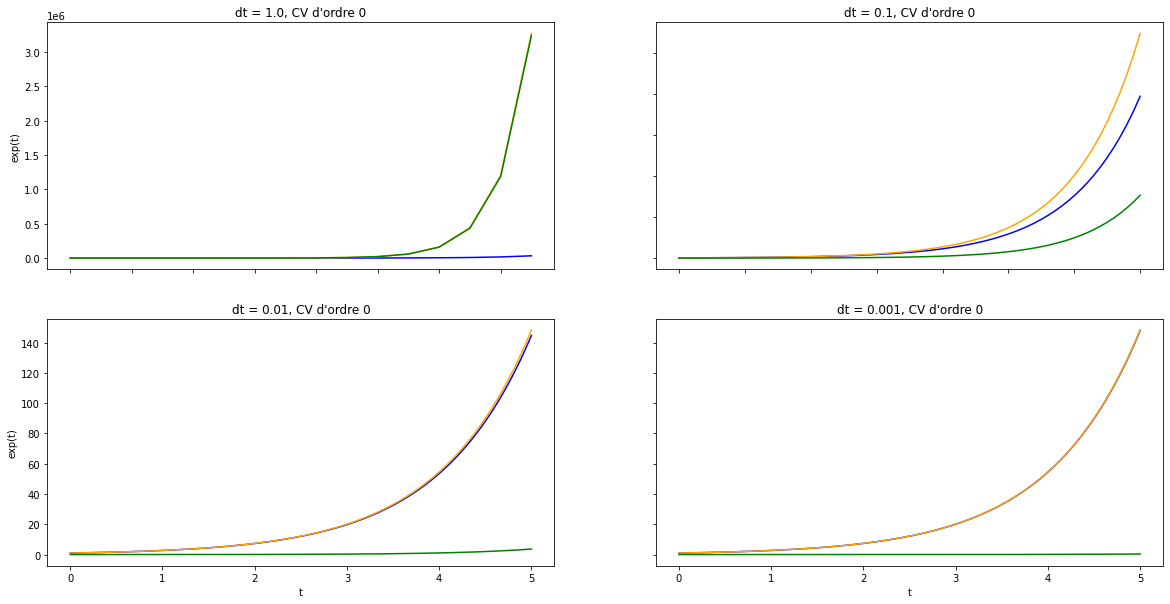

In [139]:
# Test sur la fonction exponentielle (x' = x & x(0) = 1)
def f(t,x) : return x

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(20, 10))

p=0
dt = 10e-1
t_vector, x_vector = solve_euler_explicit(f, 1, dt, 0, 15)
print(t_vector, x_vector)
y_vector = np.exp(t_vector)
ordre = np.abs(x_vector - y_vector)/dt**p
axs[0,0].plot(t_vector, x_vector, c = 'blue')
axs[0,0].plot(t_vector, y_vector, c = 'orange')
axs[0,0].plot(t_vector, ordre, c = 'green')
axs[0,0].set_title(f"dt = {dt}, CV d'ordre {p}")

p=0
dt = 10e-2
t_vector, x_vector = solve_euler_explicit(f, 1, dt, 0, 7)
y_vector = np.exp(t_vector)
ordre = np.abs(x_vector - y_vector)/dt**p
axs[0,1].plot(t_vector, x_vector, c = 'blue')
axs[0,1].plot(t_vector, y_vector, c = 'orange')
axs[0,1].plot(t_vector, ordre, c = 'green')
axs[0,1].set_title(f"dt = {dt}, CV d'ordre {p}")

p=0
dt = 10e-3
t_vector, x_vector = solve_euler_explicit(f, 1, dt, 0, 5)
y_vector = np.exp(t_vector)
ordre = np.abs(x_vector - y_vector)/dt**p
axs[1,0].plot(t_vector, x_vector, c = 'blue')
axs[1,0].plot(t_vector, y_vector, c = 'orange')
axs[1,0].plot(t_vector, ordre, c = 'green')
axs[1,0].set_title(f"dt = {dt}, CV d'ordre {p}")

p=0
dt = 10e-4
t_vector, x_vector = solve_euler_explicit(f, 1, dt, 0, 5)
y_vector = np.exp(t_vector)
ordre = np.abs(x_vector - y_vector)/dt**p
axs[1,1].plot(t_vector, x_vector, c = 'blue')
axs[1,1].plot(t_vector, y_vector, c = 'orange')
axs[1,1].plot(t_vector, ordre, c = 'green')

axs[1,1].set_title(f"dt = {dt}, CV d'ordre {p}")



for ax in axs.flat:
    ax.set(xlabel='t', ylabel='exp(t)')

for ax in axs.flat:
    ax.label_outer()

Pour visualiser graphiquement l'ordre de convergence on regarde à partir de quelle ordre la différence des deux courbes divisée par $dt^p$ n'est plus bornée.
Par ailleurs on observe que la méthode d'Euler explicite converge bien lorsque $dt \longrightarrow 0$.

### Question 7

In [98]:
alpha = 2
beta = 1
gamma = 2
delta = 1

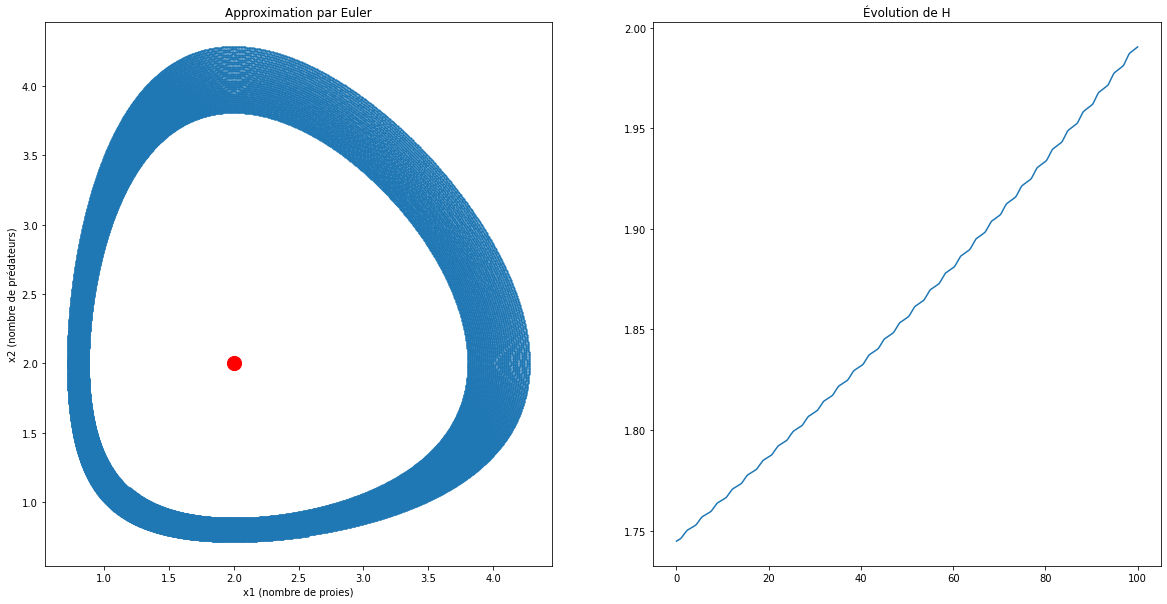

In [134]:
def f(t,x) :
    return(np.array([x[0]*(alpha-beta*x[1]), x[1]*(delta*x[0]-gamma)]))

x0 = np.array([1.2, 1.1])
t_vector, x_vector = solve_euler_explicit(f, x0, 10e-4, 0., 100.)

x1 = x_vector[:,0]
x2 = x_vector[:,1]
h = delta * x1 - gamma * np.log(x1) + beta * x2 - alpha * np.log(x2)


fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(20, 10))
axs[0].scatter(x1,x2, s = 1)
axs[0].scatter(gamma/delta, alpha/beta, s = 200, c = "red" )
axs[0].set_title("Approximation par Euler")
axs[0].set(xlabel = "x1 (nombre de proies)", ylabel = "x2 (nombre de prédateurs)")

axs[1].plot(t_vector, h)
axs[1].set_title("Évolution de H")
plt.show;

L'approximation des solutions par la méthode d'Euler explicite est correcte mais au temps long les solutions s'éloignent de plus en plus du point d'équilibre stable $\bar{x}$ ce qui n'est pas fidèle à la réalité. De plus $H$ devrait être constante au cours de l'évolution.

### Question 8

In [ ]:
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    return t_vector, x_vector

### Question 9
Pour $x \in \mathbb R_+^2$ le nouveau système s'écrit :  

$$
\dot{x} = g(x) \quad \text{avec} \quad g(x) = f(x) - u(x)(H(x)-H_0)
$$

Comme u est continûment différentiable, g l'est aussi et le théorème de Cauchy-Lipschitz peut s'appliquer.

Soit $(t_0, x_0) \in \mathbb R \times (\mathbb R_+^*)^2$ et $x : [t_0, +\infty[ \longrightarrow \mathbb R _+ ^2$ l'unique solution maximale dans $S_f(t_0, x_0)$.
On sait alors que $H(x)$ est constante donc $H(x)-H_0 = 0$ et x est également solution maximale de $S_g(t_0, x_0)$. Par unicité de la solution maximale de $S_g(t_0, x_0)$ on conclut que les solutions maximales de $S_g(t_0, x_0)$ sont identiques à celles de $S_f(t_0, x_0)$.


### Question 10

Après calcul on a le long d'une solution $x$ de ce nouveau système :

$$
\frac{\mathrm d}{\mathrm dt}(H-H_0) = (H-H_0)\left(u_1\left(\frac{\gamma}{x_1}-\delta\right) + u_2\left(\frac{\alpha}{x_2}-\beta\right)\right)
$$

De plus comme $\nabla H(x(t)) = \left(\delta-\frac{\gamma}{x_1}, \beta - \frac{\alpha}{x_2}\right)$ on peut poser :

$$
\begin{array}{l|rcl}
u : & \mathbb R_+^2 & \longrightarrow & \mathbb R_+^2 \\
    & (x_1, x_2) & \longmapsto & \left(k\left(\delta-\frac{\gamma}{x_1}\right), k\left(\beta-\frac{\alpha}{x_2}\right)\right) \end{array}
$$

qui est continûment différentiable et vérifie :

$$
\frac{\mathrm d}{\mathrm dt}(H(x(t))-H_0) = -k\;{\|\nabla H(x(t))\|}^2\;(H(x(t))-H_0)
$$  
  
<br><br>
  
On suppose qu'il existe $c>0$ tel que : $\quad \forall t \in \mathbb R, \quad \|x(t)-\bar{x}\| \geq c > 0$.

On remarque que $\nabla H(x) \xrightarrow [\|x\| \to \infty]{} (\delta, \beta) \quad$ où $\quad \delta > 0 \;$ et $ \;\beta > 0$.

Il existe donc $M>0$ tel que pour $\|x - \bar{x}\| \geq M, \quad {\|\nabla H(x)\|}^2 \geq \frac{\delta^2}{2} + \frac{\beta^2}{2}$.

De plus ${\|\nabla H(x)\|}^2$ est continue et ne s'annule pas sur le compact $K := \{x \in \mathbb R_+^2 \; | \; c \leq \|x - \bar{x}\| \leq M \}$ et atteint donc un minimum $l > 0$ sur celui-ci.

En posant $m = \min\left(\frac{\delta^2}{2} + \frac{\beta^2}{2}, l\right) > 0$ on obtient alors :
$$
\forall t \in \mathbb R, \quad{\|\nabla H(x(t)\|}^2 \geq m > 0
$$

On obtient alors que :

$$
\frac{\mathrm d}{\mathrm dt}(H(x(t))-H_0) \leq -km\,(H(x(t))-H_0)
$$

Puis en intégrant l'inégalité entre $0$ et $t$ pour $t \in \mathbb R$ :

$$
H(x(t))-H_0 \leq e^{-kmt}
$$

Et ainsi $H(x(t))$ converge exponentiellement vers $H_0$.